In [25]:
import pandas as pd
movies_df = pd.read_csv('data/movies.csv', sep=',')
rat1_df = pd.read_csv('data/ratings1.csv', sep=',')
rat2_df = pd.read_csv('data/ratings2.csv', sep=',')
date_df = pd.read_csv('data/dates.csv', sep=',')
date_df['date'] = pd.to_datetime(date_df['date'])
#date_df['date'].dt.year.value_counts() # в каком году поставили больше всего оценок

### Функция `concat()`

- `objs` — список объектов DataFrame ([df1, df2,…]), которые должны быть сконкатенированы;
- `axis` — ось определяет направление конкатенации: 0 — конкатенация по строкам (по умолчанию), 1 — конкатенация по столбцам;
- `join` — либо inner (пересечение), либо outer (объединение);
- `ignore_index` — по умолчанию установлено значение False, которое позволяет значениям индекса оставаться такими, какими они были в исходных данных. Если установлено значение True, параметр будет игнорировать исходные значения и повторно назначать значения индекса в последовательном порядке.

In [3]:
ratings = pd.concat([rat1_df, rat2_df], ignore_index=True)
ratings = ratings.drop_duplicates(ignore_index=True)
ratings_dates = pd.concat([ratings, date_df], axis=1)
display(ratings_dates.tail(7))

,userId,movieId,rating,date
100829,610,164179,5.0,2017-05-03 21:07:11
100830,610,166528,4.0,2017-05-04 06:29:25
100831,610,166534,4.0,2017-05-03 21:53:22
100832,610,168248,5.0,2017-05-03 22:21:31
100833,610,168250,5.0,2017-05-08 19:50:47
100834,610,168252,5.0,2017-05-03 21:19:12
100835,610,170875,3.0,2017-05-03 21:20:15


### Метод `join()`

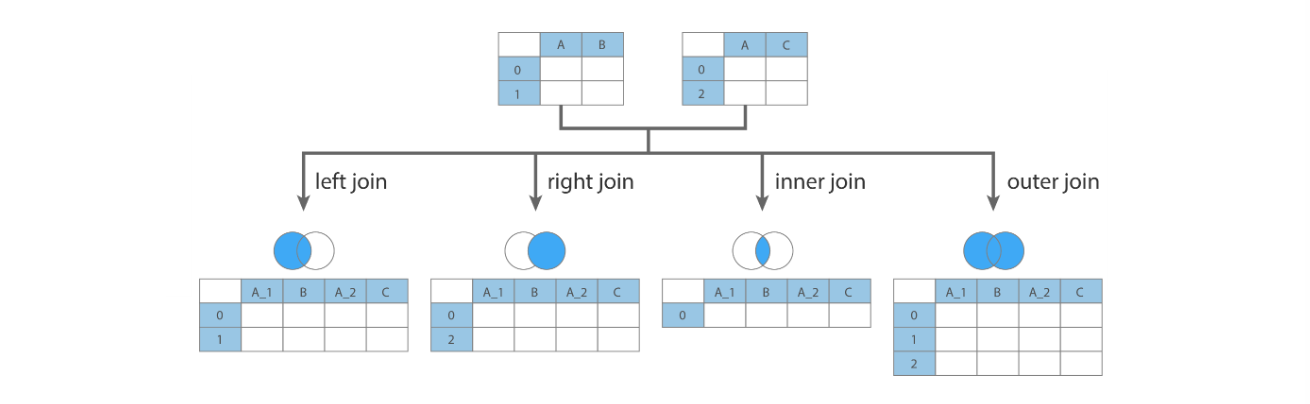

- `other` — таблица, которую мы присоединяем. При объединении она является «правой», а исходная таблица, от имени которой вызывается метод, является «левой».
- `how` — параметр типа объединения. Он может принимать значения 'inner', 'left' (left outer), 'right' (right outer), и 'outer' (full outer). По умолчанию параметр установлен на 'left'.
- `on` — параметр, который определяет, по какому столбцу в «левой» таблице происходит объединение по индексам из «правой».
- `lsuffix` и `rsuffix` — дополнения (суффиксы) к названиям одноимённых столбцов в «левой» и «правой» таблицах.

In [4]:
joined = ratings_dates.join(
    movies_df.set_index('movieId'),
    on='movieId',
    how='left'
)
display(joined.head())

,userId,movieId,rating,date,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


### Метод `merge()`

- `right` — присоединяемая таблица. По умолчанию она является «правой».
- `how` — параметр типа объединения. По умолчанию принимает значение 'inner'.
- `on` — параметр, который определяет, по какому столбцу происходит объединение. Определяется автоматически, но рекомендуется указывать вручную.
- `left_on` — если названия столбцов в «левой» и «правой» таблицах не совпадают, то данный параметр отвечает за наименования ключевого столбца исходной таблицы.
- `right_on` — аналогично предыдущему, параметр отвечает за наименование ключевого столбца присоединяемой таблицы.

In [5]:
merged = ratings_dates.merge(
    movies_df,
    on='movieId',
    how='left'
)
display(merged.head())

,userId,movieId,rating,date,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


### Решение задач

In [6]:
# выделить из признака title год выпуска фильма
# библиотека для регулярных выражений
import re 
def get_year_release(arg):
    # находим все слова по шаблону "(DDDD)"
    candidates = re.findall(r'\(\d{4}\)', arg) 
    # проверяем число вхождений
    if len(candidates) > 0:
        # если число вхождений больше 0,
	# очищаем строку от знаков "(" и ")"
        year = candidates[0].replace('(', '')
        year = year.replace(')', '')
        return int(year)
    else:
        # если год не указан, возвращаем None
        return None

In [7]:
# добавление столбца год выпуска
merged['year_release'] = merged['title'].apply(get_year_release)
merged['year_release'].isnull().sum()

18

In [51]:
# Какой фильм, выпущенный в 1999 году, получил наименьшую среднюю оценку зрителей?
test1 = merged[merged['year_release'] == 1999]
test1.groupby(by='title', as_index=False)['rating'].mean().sort_values(by=['rating'])

,title,rating
41,Bloodsport: The Dark Kumite (1999),0.5
204,Simon Sez (1999),1.0
54,Chill Factor (1999),1.0
213,"Source, The (1999)",1.0
242,Trippin' (1999),1.0
...,...,...
241,Trailer Park Boys (1999),5.0
137,Larry David: Curb Your Enthusiasm (1999),5.0
224,Sun Alley (Sonnenallee) (1999),5.0
101,George Carlin: You Are All Diseased (1999),5.0


In [54]:
# Какое сочетание жанров фильмов (genres), 
# выпущенных в 2010 году, получило наименьшую среднюю оценку (rating)?
test2 = merged[merged['year_release'] == 2010]
test2.groupby(by='genres', as_index=False)['rating'].mean().sort_values(by=['rating'])

,genres,rating
46,Action|Sci-Fi,1.000000
14,Action|Adventure|Horror,1.500000
36,Action|Drama|Fantasy,1.500000
87,Crime|Romance,1.500000
55,Adventure|Comedy|Fantasy,1.833333
...,...,...
82,Crime,4.750000
78,Comedy|Musical,5.000000
67,Animation|Drama|Fantasy|Mystery,5.000000
52,Adventure|Children|Comedy|Mystery,5.000000


In [58]:
# Какой пользователь (userId) посмотрел 
# наибольшее количество различных (уникальных) комбинаций жанров (genres) фильмов?
merged.groupby('userId')['genres'].agg(
    		['nunique', set]
).sort_values(by='nunique', ascending=False)

,nunique,set
userId,,
599,524,"{Comedy|Fantasy|Horror|Sci-Fi, Children|Musica..."
414,482,"{Action|Crime|Drama|Thriller|War, Children|Mus..."
448,403,"{Children|Musical, Comedy|Mystery|Romance, Act..."
380,399,"{Action|Crime|Drama|Thriller|War, Animation|Ch..."
474,395,"{Children|Musical, Comedy|Mystery|Romance, Act..."
...,...,...
578,15,"{Drama, Adventure|Drama|Thriller, Comedy|Fanta..."
12,15,"{Drama, Comedy|Romance|Thriller, Comedy|Drama|..."
85,13,"{Drama, Action|Comedy|Sci-Fi, Adventure|Drama,..."


In [59]:
# Найдите пользователя, который выставил наименьшее количество оценок, 
# но его средняя оценка фильмам наибольшая.
merged.groupby('userId')['rating'].agg(
    		['count', 'mean']
).sort_values(by=['count', 'mean'], ascending=[True, False])

,count,mean
userId,,
53,20,5.000000
595,20,4.200000
189,20,4.100000
569,20,4.000000
278,20,3.875000
...,...,...
274,1346,3.235884
448,1864,2.847371
474,2108,3.398956


In [8]:
# Найдите сочетание жанров (genres) за 2018 год, которое имеет наибольший средний рейтинг 
# (среднее по столбцу rating), и при этом число выставленных ему оценок 
# (количество значений в столбце rating) больше 10.

test3 = merged[merged['year_release'] == 2018]
test3.groupby(by='genres', as_index=False)['rating'].agg(
    ['mean', 'count']
    ).sort_values(by=['mean', 'count'], ascending=[False, True])

,genres,mean,count
16,Adventure|Comedy|Fantasy,4.500000,1
18,Adventure|Thriller,4.500000,1
23,Comedy|Fantasy|Sci-Fi,4.500000,1
24,Comedy|Romance,4.500000,1
9,Action|Comedy|Crime|Horror,4.000000,1
11,Action|Crime|Drama|Thriller,4.000000,1
27,Documentary,4.000000,2
5,Action|Adventure|Sci-Fi,3.928571,14
1,Action|Adventure|Children|Sci-Fi,3.900000,5
10,Action|Comedy|Sci-Fi,3.875000,12


In [23]:
# Создайте сводную таблицу, которая иллюстрирует зависимость 
# среднего рейтинга фильма от года выставления оценки и жанра.
merged['year_rating'] = merged['date'].dt.year
pivot = merged.pivot_table(
    values='rating',
    columns='year_rating',
    index='genres'
)
pivot

year_rating,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
genres,,,,,,,,,,,,,,,,,,,,,
(no genres listed),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,3.500000,3.000000,3.676471
Action,2.730769,3.538462,NaN,NaN,2.588235,3.000000,2.750000,3.833333,2.700000,3.357143,...,NaN,3.500000,4.500000,2.625000,2.500000,NaN,3.100000,3.545455,2.637931,2.588235
Action|Adventure,3.454545,4.150000,4.2,4.0,3.738462,3.500000,4.304348,3.277778,4.136364,3.413043,...,3.714286,3.437500,3.888889,3.900000,3.833333,3.875,3.560976,3.722222,3.527778,3.397436
Action|Adventure|Animation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.000,3.800000,3.750000,3.375000,3.650000
Action|Adventure|Animation|Children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.000000,3.000000,3.500,3.666667,3.833333,3.500000,3.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sci-Fi|Thriller,2.666667,3.400000,NaN,4.0,2.142857,2.500000,3.600000,3.142857,NaN,2.750000,...,4.000000,2.500000,1.833333,3.500000,3.833333,NaN,3.764706,3.916667,3.750000,3.562500
Sci-Fi|Thriller|IMAX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.000000,3.666667,4.000000,4.000,4.000000,3.666667,2.500000,NaN
Thriller,3.838095,3.923077,3.8,3.7,3.087912,3.477273,3.583333,3.250000,3.464286,3.411765,...,2.964286,2.833333,3.625000,3.083333,3.666667,4.000,2.911765,3.432432,3.152174,3.296296


### Интернет-магазин

In [63]:
import numpy as np
orders_df = pd.read_csv('data/orders.csv', sep=';')
products_df = pd.read_csv('data/products.csv', sep=';')
shop_df = orders_df.merge(
    products_df,
    how='left',
    left_on='ID товара',
    right_on='Product_ID'
)
filter = shop_df[(shop_df['Статус'] == 'Оплачен, формируется к отправке') | (shop_df['Статус'] == 'Выполнен')]
filter['Money'] = filter['Количество'] * filter['Price']
filter.groupby('ID Покупателя')['Money'].sum()

C:\Users\smart\AppData\Local\Temp\ipykernel_2644\2339081781.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter['Money'] = filter['Количество'] * filter['Price']


ID Покупателя
1        0.0
5    13043.0
7    17096.0
8     1344.0
Name: Money, dtype: float64